# Import RPB model along with other utility functions

In [1]:
from RPB_model import *

expression symbols from pyomo.core.expr  (deprecated in 6.6.2.dev0) (called
from <frozen importlib._bootstrap>:241)


# Creating model for a single side/section of the RPB

In [2]:
# Create model instance. Currently, mode can be either "adsorption" or "desorption" which sets the boundary conditions for each case.
# m=RPB_model(mode="adsorption", gas_flow_direction=1)
# or
m=RPB_model(mode="desorption", gas_flow_direction=-1)

# Custom initialization routine. Uses a homotopy routine to adjust the initialization factors so that all equations are 'active'.
single_section_init(m)
# homotopy_init_routine(m)

DOF = 0
Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        computation. See

In [3]:
# Some various utility functions that I have been using to check model performance
evaluate_MB_error(m)

print(f'CO2 Capture = {m.CO2_capture():.3}')

N2 error = 4.44e-14 %
CO2 error = -0.102 %
H2O error = 0.0 %
CO2 Capture = -1.06e+04


In [4]:
check_scaling(m)

component keys that are not exported as part of the NL file.  Skipping.
Jacobian Condition Number: 4.11e+07


In [ ]:
jac, variables, constraints = scaling_script(m)

In [ ]:
plotting(m)

In [ ]:
print(jac.getcol(11749))

In [ ]:
variables[11749].pprint()

In [ ]:
constraints[8377].pprint()

In [ ]:
constraints[12768].pprint()

In [ ]:
constraints[3836].pprint()

In [ ]:
constraints[2496].pprint()

In [ ]:
variables[461].pprint()

In [ ]:
variables[768].pprint()

In [ ]:
[m.Rs_CO2[z,o]() for z,o in m.dheat_fluxdz.keys()]

In [ ]:
print(iscale.get_scaling_factor(constraints[927]))

# Creating a full RPB model

In [5]:
# create pyomo model
RPB = full_model_creation(lean_temp_connection=True, configuration = "counter-current")

In [6]:
# initialize using BlockTriangularizationInitializer() with a list of values for initialization factors within the models
init_routine_1(RPB, homotopy_steps=[1])

DOF=  0
Ipopt 3.13.2: max_iter=500


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        com

In [10]:
# or load a previous solution and solve
from_json(RPB, fname="base case 120323.json.gz", gz=True)

solver = SolverFactory("ipopt")
solver.options = {
    "max_iter": 1000,
    "bound_push": 1e-22,
    "halt_on_ampl_error": "yes",
}
solver.solve(RPB, tee=True).write()

component keys that are not exported as part of the NL file.  Skipping.
component keys that are not exported as part of the NL file.  Skipping.
Ipopt 3.13.2: max_iter=1000
bound_push=1e-22
halt_on_ampl_error=yes


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material r

In [11]:
report(RPB)

,Value,Doc,Fixed
ads.L,3.000000,Bed Length [m],True
ads.D,10.000000,Bed diameter [m],True
ads.w_rpm,1.000000,bed rotational speed [revolutions/min],True
ads.theta,0.750000,Fraction of bed [-],True
des.theta,0.250000,Fraction of bed [-],False
ads.P_in,1.025649,Inlet flue gas pressure [bar],True
ads.P_out,1.013250,Outlet adsorber pressure [bar],True
ads.F_in,130.597023,Inlet adsorber gas flow [mol/s],False
ads.Tg_in,363.000000,Inlet flue gas temperature [K],True
ads.Tx,363.000000,"heat exchange fluid temperature, constant [K]",True


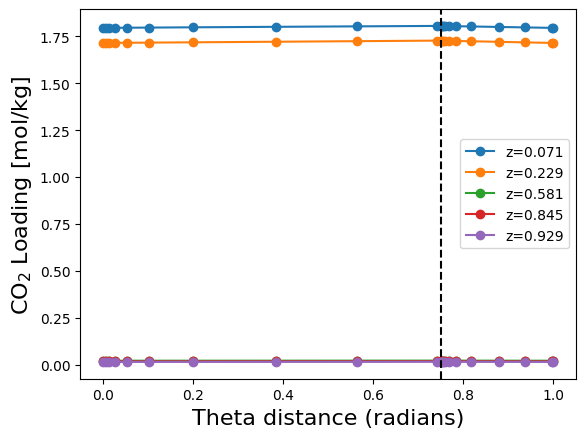

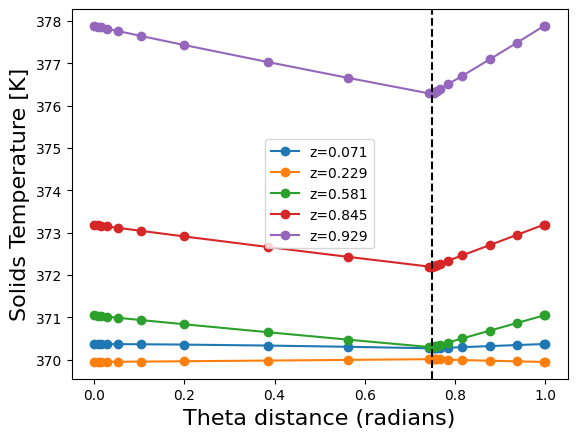

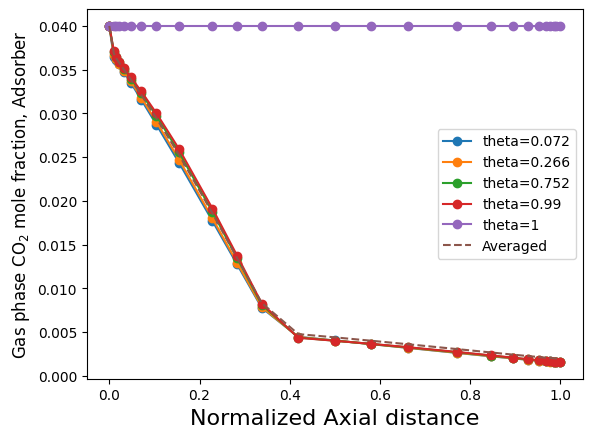

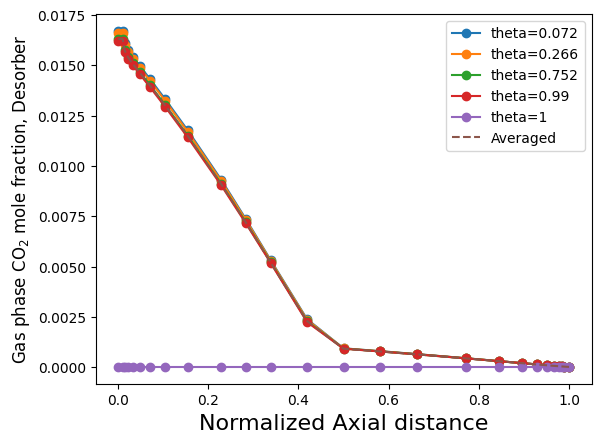

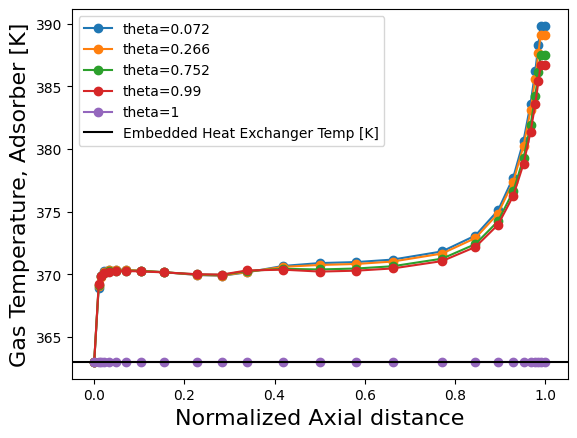

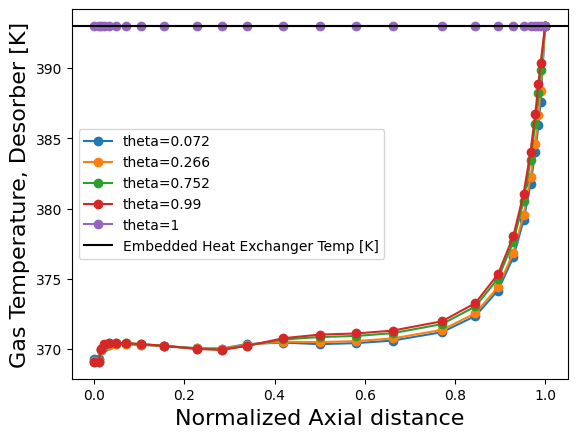

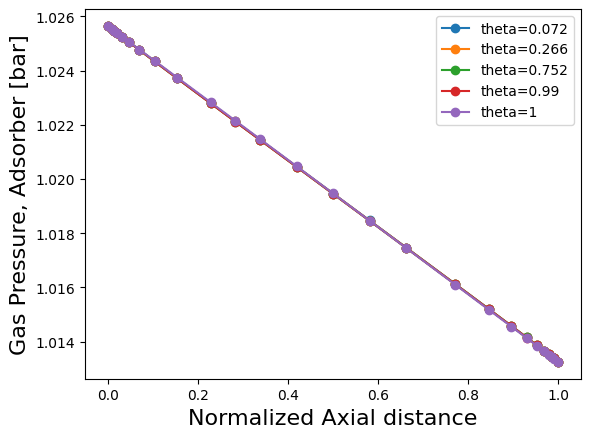

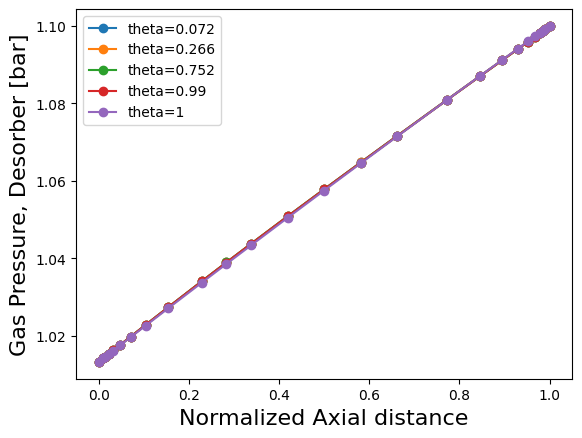

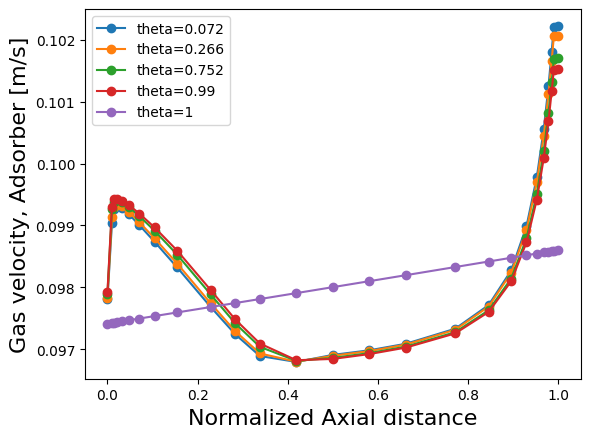

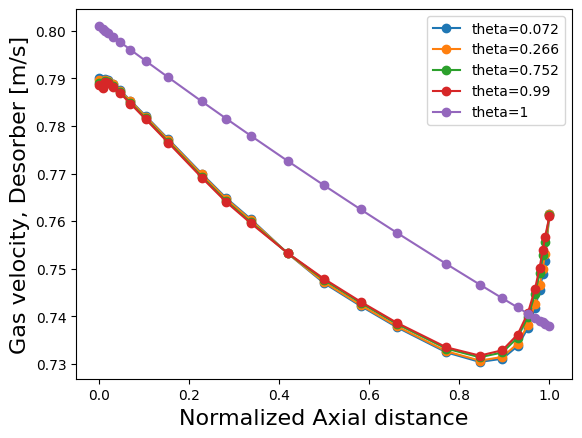

In [12]:
full_contactor_plotting(RPB)

In [13]:
evaluate_MB_error(RPB.ads)
print(' ')
evaluate_MB_error(RPB.des)

N2 error = -2.66e-13 %
CO2 error = 0.0441 %
H2O error = -2.22e-13 %
 
N2 error = 2.22e-14 %
CO2 error = 0.0458 %
H2O error = 4.44e-14 %


In [ ]:
check_scaling(RPB)

In [ ]:
jac, variables, constraints = scaling_script(RPB)

In [ ]:
print(jac.getcol(15066))

In [ ]:
constraints[12301].pprint()

In [ ]:
constraints[3964].pprint()

In [ ]:
variables[1760].pprint()

In [ ]:
variables[1739].pprint()

In [ ]:
variables[7419].pprint()

In [ ]:
print(iscale.get_scaling_factor(constraints[2722]))

In [ ]:
print(iscale.get_scaling_factor(variables[4336]))

In [ ]:
[RPB.ads.dTsdo[z,o]() for z,o in RPB.ads.dTsdo.keys()]

# Optimization

In [14]:
# create regularization parameter for the objective function
RPB.alpha_obj = Param(initialize=0.9, mutable=True)

# add objective
@RPB.Expression()
def obj(RPB):
    return RPB.alpha_obj * RPB.energy_requirement/10 - (1 - RPB.alpha_obj) * RPB.productivity/20

RPB.objective = Objective(expr=RPB.obj)

RPB.objective.pprint()

objective : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize :        obj


In [30]:
RPB.ads.L.setlb(0.1)
RPB.ads.L.setub(20)
RPB.ads.L.pprint()

L : Bed Length [m]
    Size=1, Index=None, Units=m
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :   0.1 :   0.5 :    20 : False : False :  Reals


In [16]:
RPB.ads.Tx.setlb(25+273)
RPB.ads.Tx.setub(95+273)
RPB.ads.Tx.pprint()

Tx : heat exchange fluid temperature, constant [K]
    Size=1, Index=None, Units=K
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :   298 :   363 :   368 :  True :  True :  Reals


In [17]:
RPB.des.Tx.setlb(100+273)
RPB.des.Tx.setub(160+273)
RPB.des.Tx.pprint()

Tx : heat exchange fluid temperature, constant [K]
    Size=1, Index=None, Units=K
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :   373 :   393 :   433 :  True :  True :  Reals


In [18]:
RPB.des.P_in.setub(1.5)
RPB.des.P_in.setlb(1.0133)
RPB.des.P_in.pprint()

P_in : Inlet flue gas pressure [bar]
    Size=1, Index=None, Units=bar
    Key  : Lower  : Value : Upper : Fixed : Stale : Domain
    None : 1.0133 :   1.1 :   1.5 :  True :  True :  Reals


In [19]:
degrees_of_freedom(RPB)

0

In [29]:
RPB.ads.w_rpm.setlb(0.0001)
RPB.ads.w_rpm.setub(5)
RPB.ads.w_rpm.pprint()

w_rpm : bed rotational speed [revolutions/min]
    Size=1, Index=None, Units=turn/min
    Key  : Lower  : Value : Upper : Fixed : Stale : Domain
    None : 0.0001 :     1 :     5 :  True :  True :  Reals


In [ ]:
RPB.ads.w_rpm = 0.001
RPB.ads.w_rpm.pprint()

In [35]:
# free up decision variables
RPB.ads.L.unfix()
RPB.ads.theta.unfix()
RPB.des.P_in.unfix()
RPB.ads.Tx.unfix()
RPB.des.Tx.unfix()
RPB.ads.w_rpm.unfix()

In [36]:
degrees_of_freedom(RPB)

6

In [37]:
# solve using conopt thorugh gams
results = SolverFactory("gams").solve(
    RPB,
    tee=True,
    keepfiles=True,
    solver="conopt4",
    tmpdir="temp",
    add_options=["gams_model.optfile=1;"],
)

--- Job model.gms Start 12/13/23 16:05:56 40.4.0 d540b52e WEX-WEI x86 64bit/MS Windows
--- Applying:
    C:\GAMS\40\gmsprmNT.txt
--- GAMS Parameters defined
    Input "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\model.gms"
    Output "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\output.lst"
    ScrDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\225d\"
    SysDir C:\GAMS\40\
    CurDir "c:\Users\hughesr\NETL\CCSI\fixed bed adsorption\fixed_bed_adsorption\Rotary packed bed\temp\"
    LogOption 3
Licensee: Medium MUD - 10 User License                   G211229|0002CN-GEN
          U.S. Department of Energy, National Energy Technology LaborDC9138
          C:\Users\hughesr\Documents\GAMS\gamslice.txt
          License Admin: Anthony P. Burgard, anthony.burgard@netl.doe.gov  
Processor information: 1 socket(s), 8 core(s), and 16 thread(s) available


In [ ]:
# or solve using ipopt
solver = SolverFactory("ipopt")
solver.options = {
    "max_iter": 1000,
    "bound_push": 1e-8,
    # "halt_on_ampl_error": "yes",
    "tol": 1e-4,
    "max_cpu_time": 5*60,
    # "mu_strategy": "adaptive",
}
solver.solve(RPB, tee=True).write()

In [38]:
report(RPB)

,Value,Doc,Fixed
ads.L,3.569323,Bed Length [m],False
ads.D,10.000000,Bed diameter [m],True
ads.w_rpm,0.001171,bed rotational speed [revolutions/min],False
ads.theta,0.473645,Fraction of bed [-],False
des.theta,0.526355,Fraction of bed [-],False
ads.P_in,1.025649,Inlet flue gas pressure [bar],True
ads.P_out,1.013250,Outlet adsorber pressure [bar],True
ads.F_in,69.881217,Inlet adsorber gas flow [mol/s],False
ads.Tg_in,363.000000,Inlet flue gas temperature [K],True
ads.Tx,366.271664,"heat exchange fluid temperature, constant [K]",False


In [39]:
evaluate_MB_error(RPB.ads)
print(' ')
evaluate_MB_error(RPB.des)

N2 error = 6.66e-14 %
CO2 error = 0.572 %
H2O error = -4e-13 %
 
N2 error = -6.72e-11 %
CO2 error = 8.63 %
H2O error = -7.41e-11 %


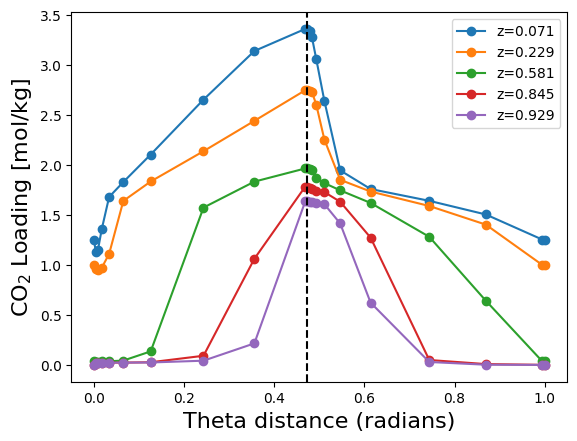

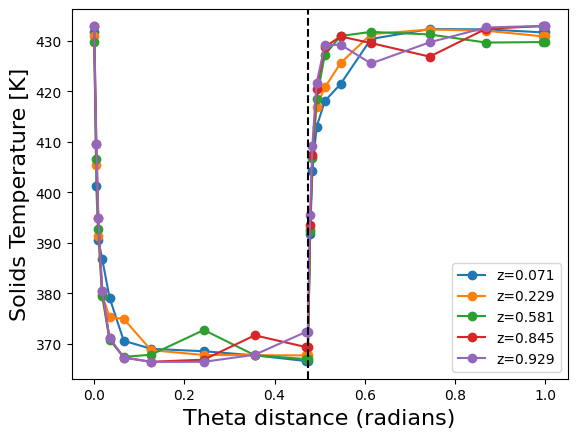

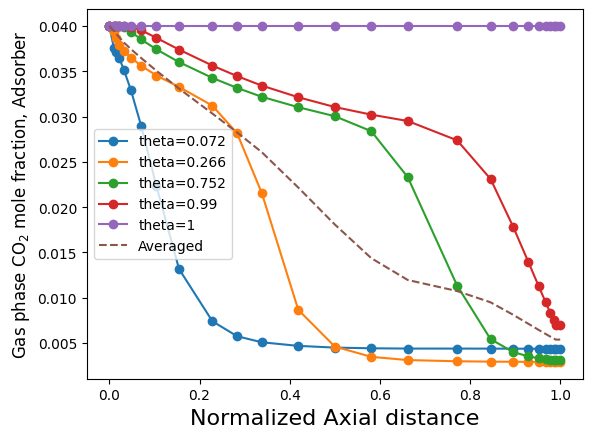

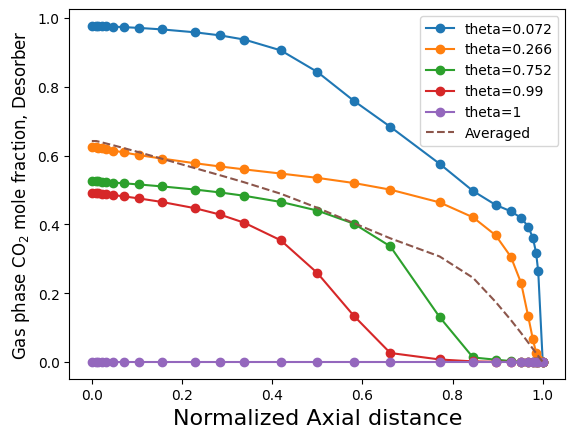

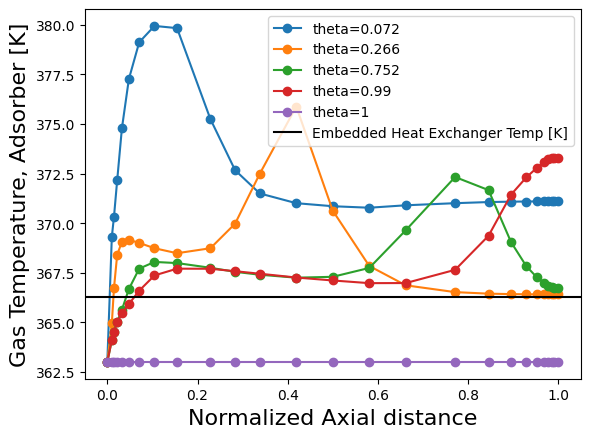

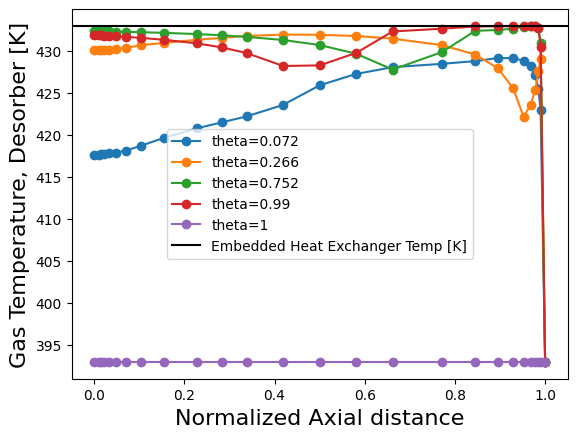

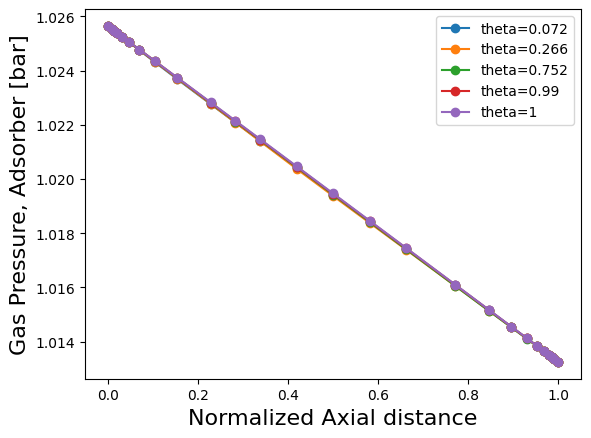

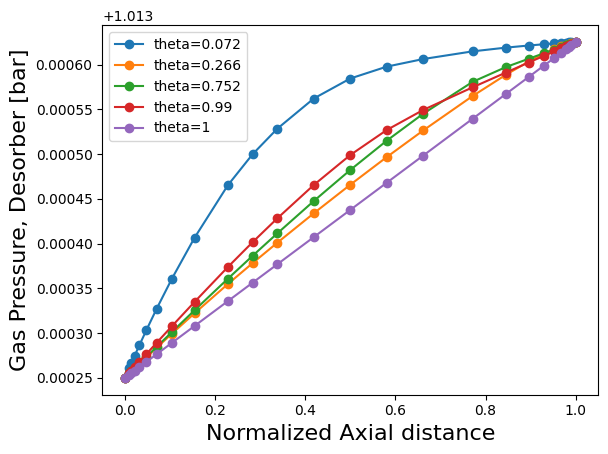

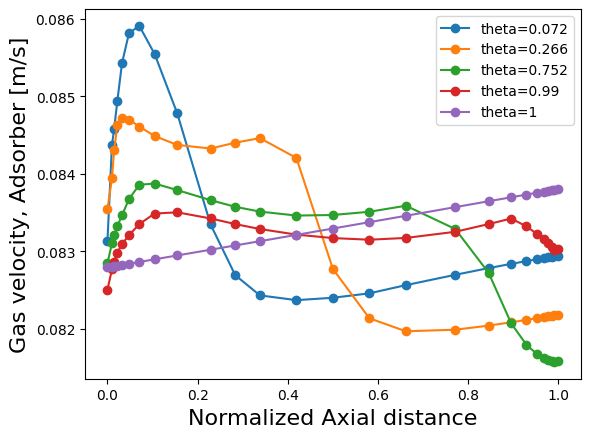

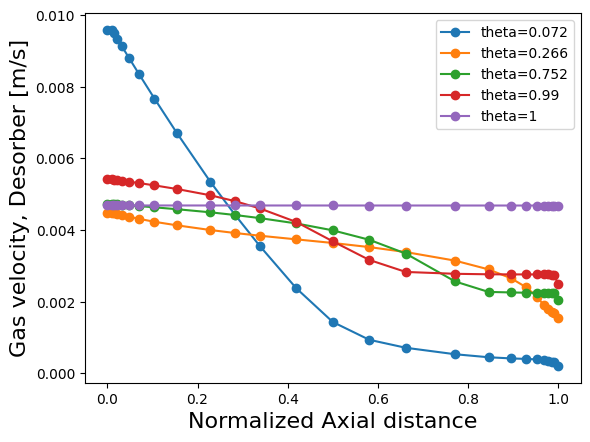

In [40]:
full_contactor_plotting(RPB)

# Sensitivity Testing

In [ ]:
RPB.objective = Objective(expr=0)

In [ ]:
RPB.ads.CO2_capture=0.9

In [ ]:
RPB.ads.theta.fix()

In [ ]:
RPB.ads.theta = 0.7
RPB.des.theta = 0.3

In [ ]:
RPB.ads.w_rpm = 0.0005

In [ ]:
results = SolverFactory("gams").solve(
    RPB,
    tee=True,
    keepfiles=True,
    solver="conopt4",
    tmpdir="temp",
    add_options=["gams_model.optfile=1;"],
)

In [ ]:
report(RPB)

In [ ]:
[RPB.ads.qCO2[z,o]() for z,o in RPB.ads.qCO2_eq.keys()]

In [ ]:
RPB.alpha_obj = 0.999

In [ ]:
RPB.alpha_obj()

In [ ]:
RPB.ads.a_sp = 30
RPB.des.a_sp = 30

In [ ]:
alpha_list=[0.999,0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05,0.01,0.001]

In [ ]:
E = []
P = []

for j in alpha_list:
    RPB.alpha_obj = j

    results = SolverFactory("gams").solve(
        RPB,
        tee=True,
        keepfiles=True,
        solver="conopt4",
        tmpdir="temp",
        add_options=["gams_model.optfile=1;"],
    )

    E.append(RPB.energy_requirement())
    P.append(RPB.productivity())


In [ ]:
E

In [ ]:
P

In [ ]:
[RPB.des.qCO2[z,o]() for z,o in RPB.ads.qCO2_eq.keys()]

In [ ]:
for z,o in RPB.ads.qCO2_eq.keys():
    print(f'{o},') 

# Save Model

In [ ]:
# save model
to_json(RPB, fname="base case 120323.json.gz", gz=True, human_read=False)